# PCA 範例

## 爲什麼需要降低維度 ?
降低維度可以幫助我們
 - 壓縮資料
 - 丟棄無⽤資訊
 - 抽象化及組合新特徵
 - 呈現⾼維數據。
常⽤的算法爲主成分分析。

---
## 主成份分析 (PCA)

 - 實務上我們經常遇到資料有非常多的 features, 有些 features 可能⾼度相關，有什麼⽅法能夠把⾼度相關的 features 去除？
 - PCA 透過計算 eigen value, eigen vector, 可以將原本的 features 降維⾄特定的維度
   - 新 features 為舊 features 的線性組合
 - 組合出來的這些新的 features 可以進⽽⽤來做 supervised learning 預測模型
 - 以判斷⼈臉爲例 , 最重要的特徵是眼睛、⿐⼦、嘴巴，膚⾊和頭髮等都可以捨棄，將這些不必要的資訊捨棄除了可以加速 learning , 也可以避免⼀點overfitting。
   
### PCA 應用在監督式學習的注意事項
 - 不建議在早期時做 , 否則可能會丟失重要的 features ⽽ underfitting . 
 - 可以在 optimization 階段時 , 考慮 PCA , 並觀察運⽤了 PCA 後對準確度的影響

# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
%matplotlib inline
np.random.seed(9487)

pca = PCA(n_components=3)

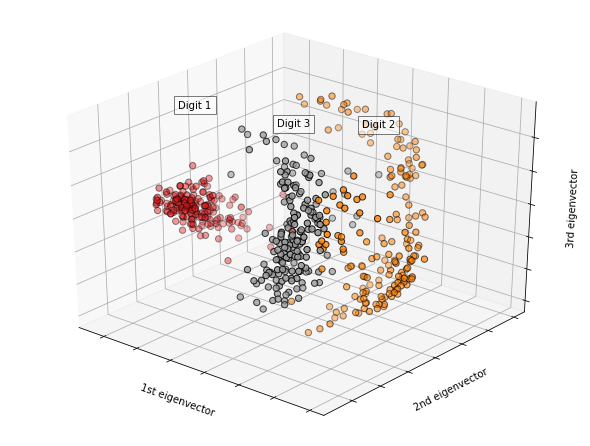

In [3]:
X = pca.fit_transform(digits.data)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=50)


for name, label in [('Digit 1', 0), ('Digit 2', 1), ('Digit 3', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean() - 30, 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='k', facecolor='w'))
    
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, s=40,
           edgecolor='k')

ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.legend
plt.show()